In [8]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
data1=pd.read_csv('/Users/zhanglianghao/Desktop/研究生文件/data analysis/数据分析作业2/(sample)sam_tianchi_mum_baby.csv',encoding='gbk')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   953 non-null    int64
 1   birthday  953 non-null    int64
 2   gender    953 non-null    int64
dtypes: int64(3)
memory usage: 22.5 KB


In [3]:
data2=pd.read_csv('/Users/zhanglianghao/Desktop/研究生文件/data analysis/数据分析作业2/(sample)sam_tianchi_mum_baby_trade_history.csv',encoding='gbk')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29971 entries, 0 to 29970
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     29971 non-null  int64 
 1   auction_id  29971 non-null  int64 
 2   cat_id      29971 non-null  int64 
 3   cat1        29971 non-null  int64 
 4   property    29827 non-null  object
 5   buy_mount   29971 non-null  int64 
 6   day         29971 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.6+ MB


因为property是商品具体信息，难具体提取使用，故保留缺失值

In [5]:
data3=pd.merge(data1,data2,on=['user_id'],how='outer')
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29971 entries, 0 to 29970
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     29971 non-null  int64  
 1   birthday    956 non-null    float64
 2   gender      956 non-null    float64
 3   auction_id  29971 non-null  int64  
 4   cat_id      29971 non-null  int64  
 5   cat1        29971 non-null  int64  
 6   property    29827 non-null  object 
 7   buy_mount   29971 non-null  int64  
 8   day         29971 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 2.3+ MB


In [13]:
dt=data3['user_id'].duplicated(keep='first')
j=0
for i in range(len(dt)):
    if dt[i]:
        print(i)
        j+=1
print(j)

116
465
709
2729
3693
4037
4050
5626
5627
5628
5900
6369
6865
7385
7581
9315
9771
9819
10037
10978
11089
11161
13515
16074
16414
20709
24430
27


29971一共27条有重复的id，比例较低，继续分析

# 销量

In [167]:
data2['month']=data2['day'].apply(lambda x:str(x)[:6])
data2.head(20)

,user_id,auction_id,cat_id,cat1,property,buy_mount,day,month
0,786295544,41098319944,50014866,50022520,21458:86755362;13023209:3593274;10984217:21985...,2,20140919,201409
1,532110457,17916191097,50011993,28,21458:11399317;1628862:3251296;21475:137325;16...,1,20131011,201310
2,249013725,21896936223,50012461,50014815,21458:30992;1628665:92012;1628665:3233938;1628...,1,20131011,201310
3,917056007,12515996043,50018831,50014815,21458:15841995;21956:3494076;27000458:59723383...,2,20141023,201410
4,444069173,20487688075,50013636,50008168,21458:30992;13658074:3323064;1628665:3233941;1...,1,20141103,201411
5,152298847,41840167463,121394024,50008168,21458:3408353;13023209:727117752;22009:2741771...,1,20141103,201411
6,513441334,19909384116,50010557,50008168,25935:21991;1628665:29784;22019:34731;22019:20...,1,20121212,201212
7,297411659,13540124907,50010542,50008168,21458:60020529;25935:31381;1633959:27247291;16...,1,20121212,201212
8,82830661,19948600790,50013874,28,21458:11580;21475:137325,1,20121101,201211
9,475046636,10368360710,203527,28,22724:40168;22729:40278;21458:21817;2770200:24...,1,20121101,201211


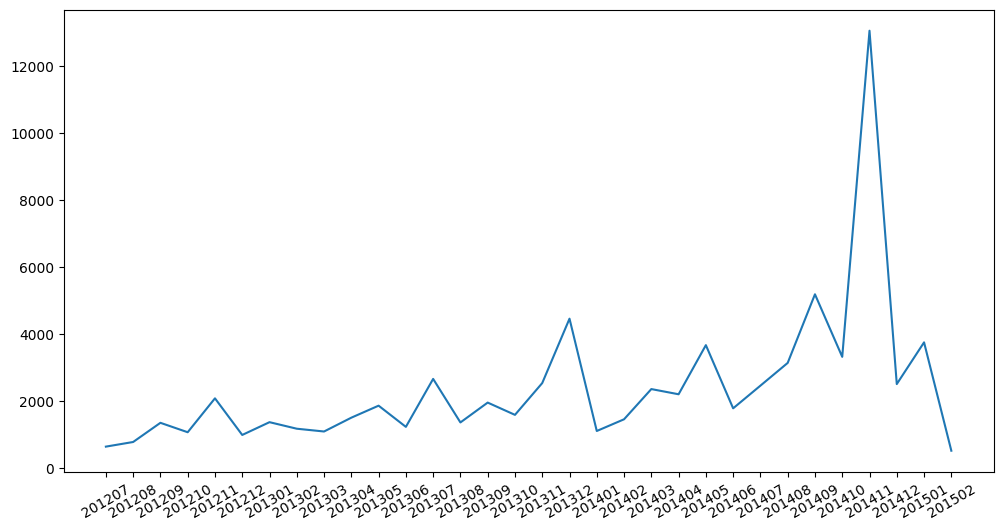

In [19]:
sale_trend=data2.groupby(['month'])['buy_mount'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(sale_trend)
plt.xticks(rotation=30)
plt.show()

销售量在2012年7月至2014年5月在波动上升，2014年11月销量相对前后有暴涨，可能当时刚提出双十一带来销量
同时销售提升点主要集中在年中5-6月份和年末11月份

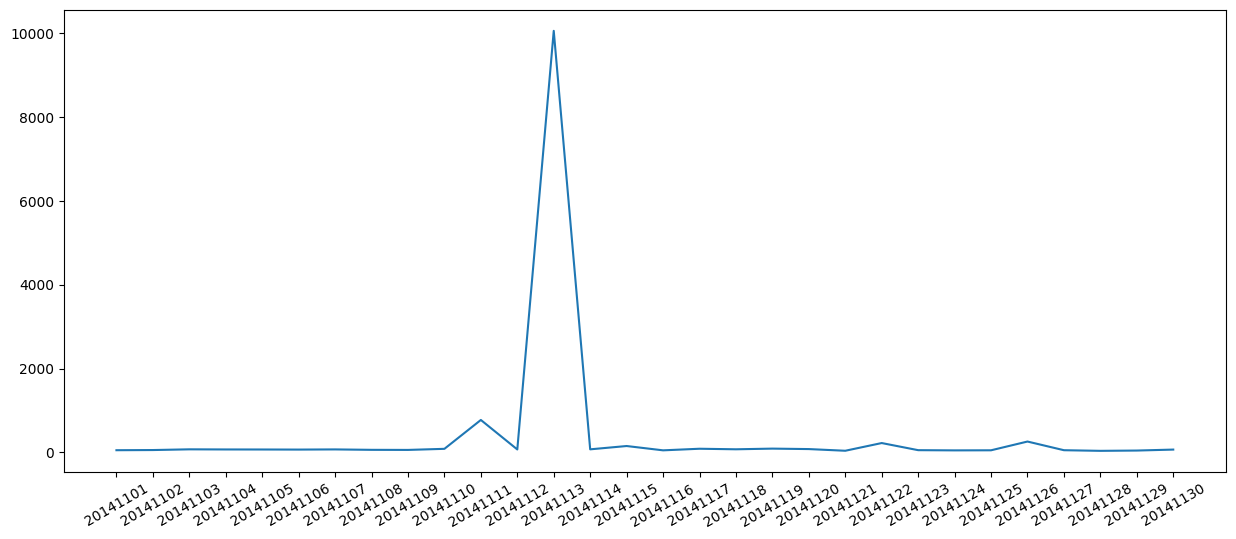

In [44]:
sale_201411=data2[data2['month']=='201411']
sale_trend_201411=sale_201411.groupby(['day'],as_index=False)['buy_mount'].sum()
# print(sale_trend_201411)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.xticks(ticks=sale_trend_201411.index,labels=sale_trend_201411['day'])
plt.plot(sale_trend_201411['buy_mount'])
plt.xticks(rotation=30)
plt.show()

说明母婴用品销量聚焦于12日，可能就是当年双十一促销日

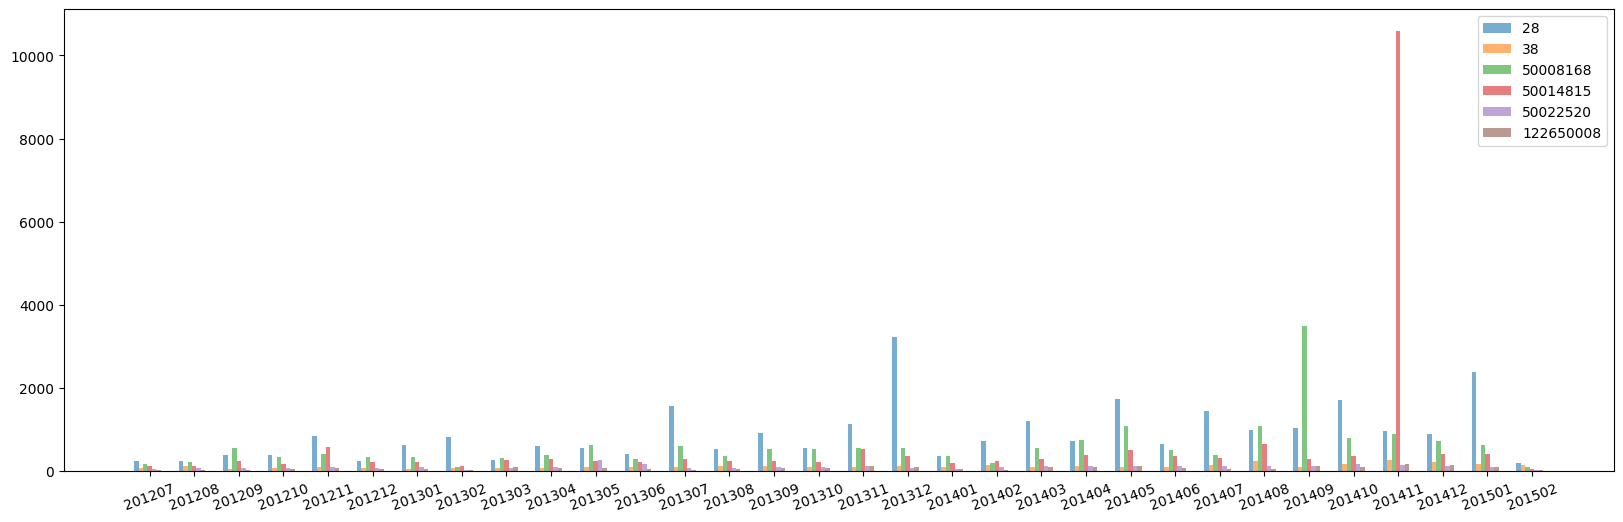

In [81]:
sale_trend_cat1=data2.groupby(['month','cat1'],as_index=False)['buy_mount'].sum()
cat1_name=[sale_trend_cat1['cat1'][i] for i in range(6)]
date_num=[sale_trend_cat1['month'][i] for i in range(0,192,6)]

cat1_sale={}
for i in range(len(cat1_name)):
    cat1_sale[i]=[]
for i in range(len(sale_trend_cat1.index)):
    if sale_trend_cat1.loc[i]['cat1']==cat1_name[0]:
        cat1_sale[0].append(sale_trend_cat1.loc[i]['buy_mount'])
    if sale_trend_cat1.loc[i]['cat1']==cat1_name[1]:
        cat1_sale[1].append(sale_trend_cat1.loc[i]['buy_mount'])
    if sale_trend_cat1.loc[i]['cat1']==cat1_name[2]:
        cat1_sale[2].append(sale_trend_cat1.loc[i]['buy_mount'])
    if sale_trend_cat1.loc[i]['cat1']==cat1_name[3]:
        cat1_sale[3].append(sale_trend_cat1.loc[i]['buy_mount'])
    if sale_trend_cat1.loc[i]['cat1']==cat1_name[4]:
        cat1_sale[4].append(sale_trend_cat1.loc[i]['buy_mount'])
    if sale_trend_cat1.loc[i]['cat1']==cat1_name[5]:
        cat1_sale[5].append(sale_trend_cat1.loc[i]['buy_mount'])

import matplotlib.pyplot as plt
import numpy as np

width=0.1
x_sale=np.arange(len(date_num))
plt.figure(figsize=(20,6))
plt.xticks([i+3*width for i in x_sale],date_num,rotation=20)
plt.bar(x_sale,cat1_sale[0],alpha=0.6,width=width,label=cat1_name[0])
plt.bar([i+width for i in x_sale],cat1_sale[1],alpha=0.6,width=width,label=cat1_name[1])
plt.bar([i+2*width for i in x_sale],cat1_sale[2],alpha=0.6,width=width,label=cat1_name[2])
plt.bar([i+3*width for i in x_sale],cat1_sale[3],alpha=0.6,width=width,label=cat1_name[3])
plt.bar([i+4*width for i in x_sale],cat1_sale[4],alpha=0.6,width=width,label=cat1_name[4])
plt.bar([i+5*width for i in x_sale],cat1_sale[5],alpha=0.6,width=width,label=cat1_name[5])
plt.legend()
plt.show()

大致观察到销量差异，比如28销量在涨，但在2015年2月急速萎缩；50014815销量每年都在波动，却在2014年11月贡献大部分销量，可能其促销力度、宣传力度暴增；还有2014年9月50008168销量猛增，昙花一现

# 销量/年龄

In [84]:
data4=data3.dropna(subset=['birthday'])
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 955
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     956 non-null    int64  
 1   birthday    956 non-null    float64
 2   gender      956 non-null    float64
 3   auction_id  956 non-null    int64  
 4   cat_id      956 non-null    int64  
 5   cat1        956 non-null    int64  
 6   property    954 non-null    object 
 7   buy_mount   956 non-null    int64  
 8   day         956 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 74.7+ KB


In [203]:
import datetime
import math

birthday=data4['birthday'].apply(lambda x:datetime.datetime.strptime(str(str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8]),"%Y-%m-%d"))
buyday=data4['day'].apply(lambda x:datetime.datetime.strptime(str(str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8]),"%Y-%m-%d"))
age=buyday-birthday


for i in range(len(age.index)):
    if int(age[i].days)>0:
        if int(age[i].days)//365>=1:
            age[i]=str((age[i].days)//365)+' year'
        elif int(age[i].days)//30>=1:
            age[i]=str((age[i].days)//30)+' month'
        else:
            age[i]=str(age[i].days)+' day'
    elif abs((age[i].days)//30)>=1:
        age[i]=str(age[i].days//30)+' month'
    else:
        age[i]=str(age[i].days)+' day'

data4['age']=age
data4.head(20)

/var/folders/dd/m3wlgwg54hq95ygnq6mfl98r0000gn/T/ipykernel_4157/2176526521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['age']=age


,user_id,birthday,gender,auction_id,cat_id,cat1,property,buy_mount,day,age
0,2757,20130311.0,1.0,17429550751,50010555,50008168,21458:30992;25935:31381;1628665:29796;1628665:...,1,20130410,1 month
1,415971,20121111.0,0.0,20854308837,50010548,50008168,1628665:131622;25935:21991;22019:31001;22019:3...,1,20130128,2 month
2,1372572,20120130.0,1.0,16915013171,50008845,28,21458:30992;1628665:3233941;1628665:3233942;16...,1,20130327,1 year
3,10339332,20110910.0,0.0,13174075495,50001732,50014815,21458:3409452;3066697:92335415;2815901:9233541...,1,20140526,2 year
4,10642245,20130213.0,0.0,14109039851,50006843,38,21458:7142737;8694098:95303334;12786373:54223;...,1,20130617,4 month
5,10923201,20110830.0,1.0,19166868327,50013636,50008168,21458:216291676;13023209:3336448;35044286:5242...,1,20140328,2 year
6,11768880,20120107.0,1.0,19025967309,50012364,122650008,21458:30992;1628665:3233942;1628665:3233939;16...,1,20130411,1 year
7,12519465,20130705.0,1.0,18981655392,50018831,50014815,1556:43332;21458:21896;7255170:116596259;27133...,1,20130910,2 month
8,12950574,20090708.0,0.0,37840677938,50012474,28,1628665:29790;1628665:3233936;1628665:3233937;...,3,20140610,4 year
9,13735440,20120323.0,0.0,18163455793,211122,38,21458:138742;36816:141627536;6933553:3313377;1...,6,20131219,1 year


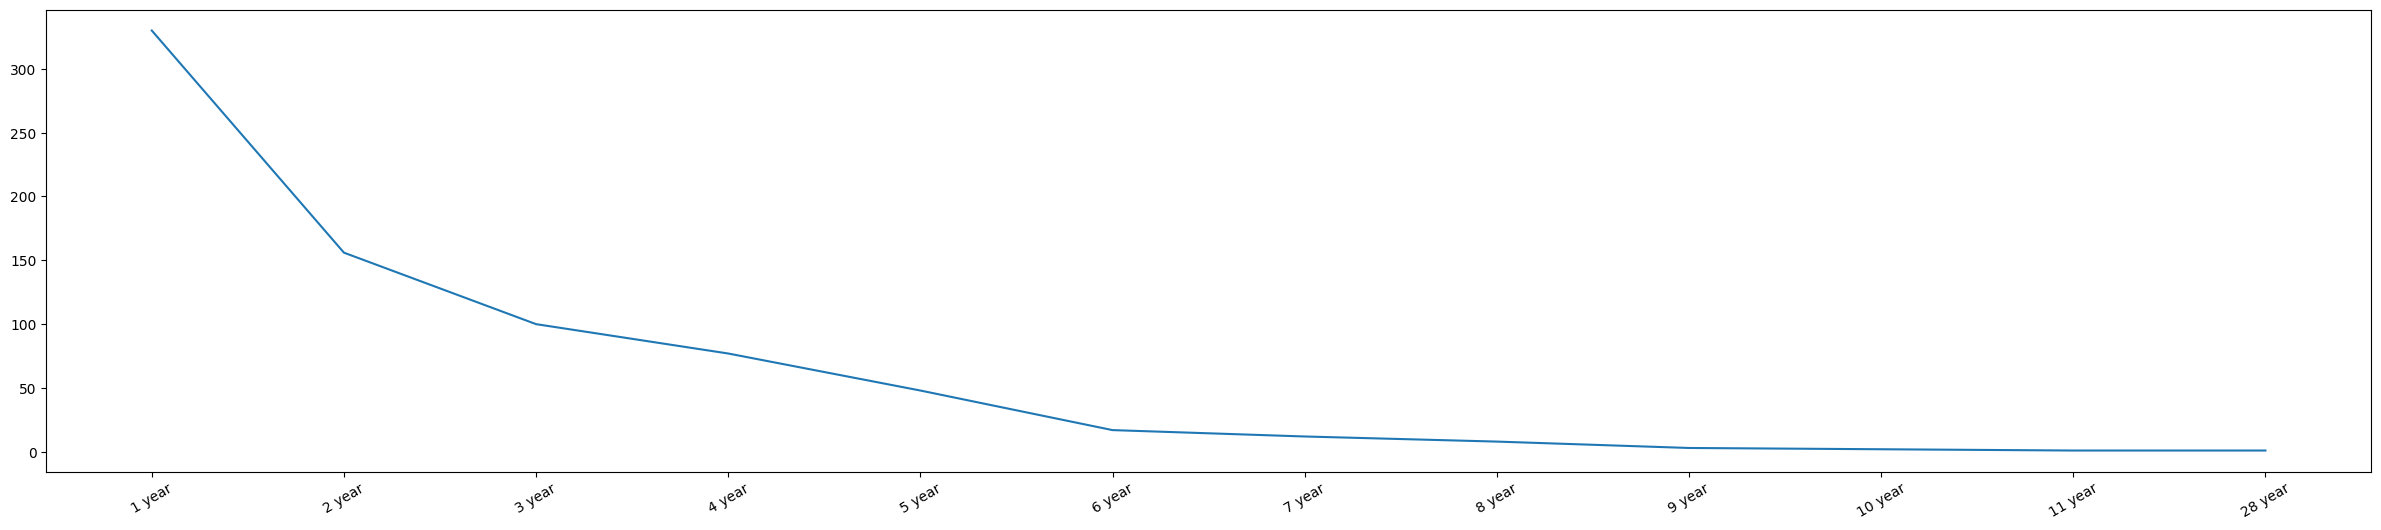

In [219]:
age_sale_trend_year=data4[data4['age'].str.contains('year')]
age_sale_trend_year=age_sale_trend_year.groupby(['age'],as_index=False)['buy_mount'].sum()
age_sale_trend_year=age_sale_trend_year.reindex([0,3,5,6,7,8,9,10,11,1,2,4])
age_sale_trend_year

import matplotlib.pyplot as plt

plt.figure(figsize=(30,6))
plt.xticks(rotation=30)
plt.plot(age_sale_trend_year.age,age_sale_trend_year.buy_mount)
plt.show()

在婴儿出生一年到两年内购买较多，且趋势逐年降低

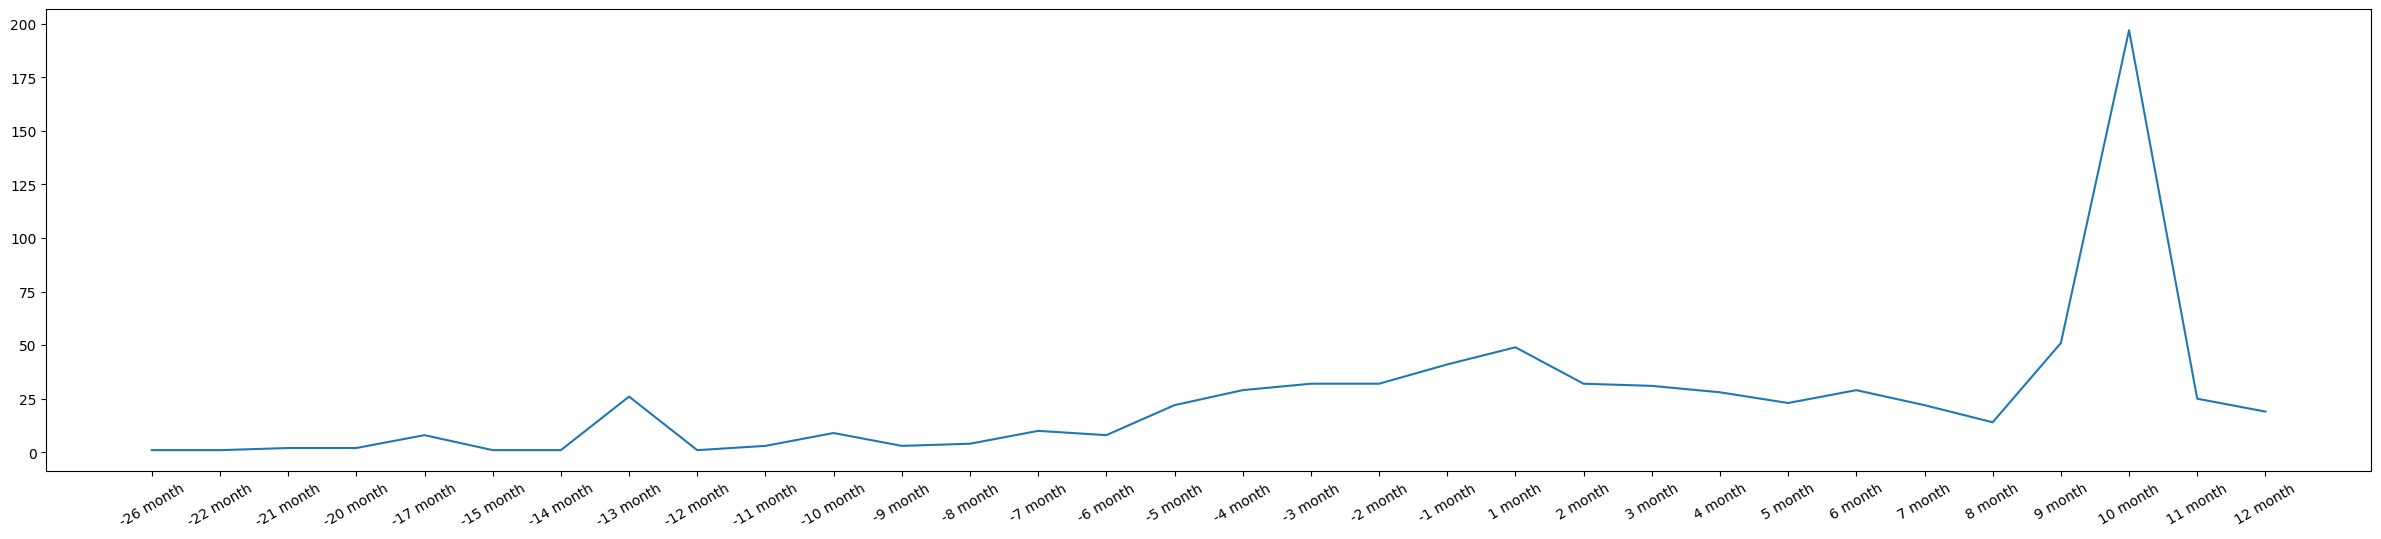

In [212]:
age_sale_trend_month=data4[data4['age'].str.contains('month')]
age_sale_trend_month=age_sale_trend_month.groupby(['age'],as_index=False)['buy_mount'].sum()
age_sale_trend_month=age_sale_trend_month.reindex([12,11,10,9,7,6,5,4,3,2,1,19,18,17,16,15,14,13,8,0,20,24,25,26,27,28,29,30,31,21,22,23])
age_sale_trend_month

import matplotlib.pyplot as plt

plt.figure(figsize=(30,6))
plt.xticks(rotation=30)
plt.plot(age_sale_trend_month.age,age_sale_trend_month.buy_mount)
plt.show()

一般在出生前13周可能购买以提前准备，还有在出生前6周就逐步有准备的，在出生后10周会出现购置需要顶峰

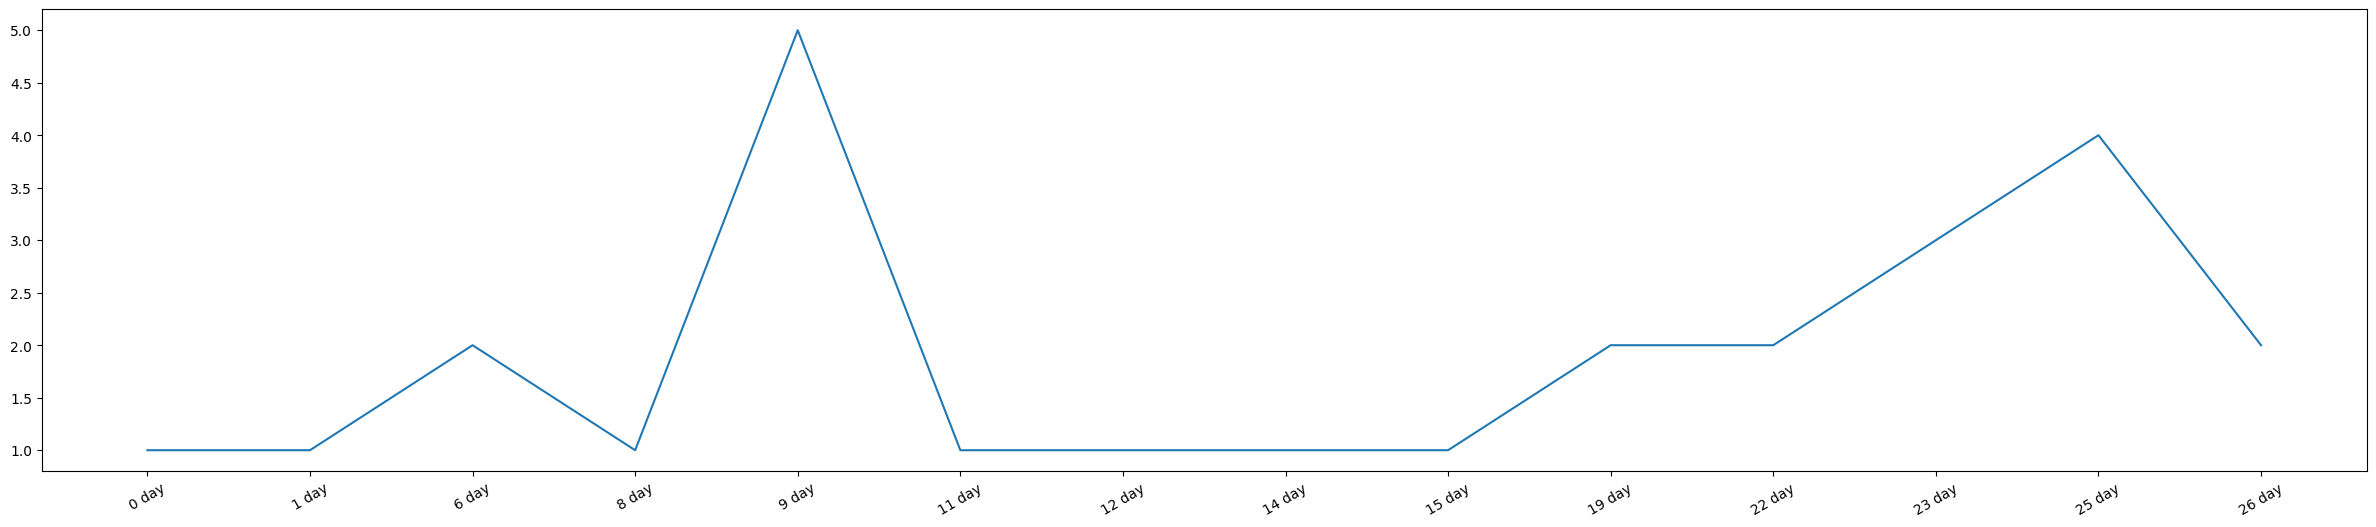

In [218]:
age_sale_trend_day=data4[data4['age'].str.contains('day')]
age_sale_trend_day=age_sale_trend_day.groupby(['age'],as_index=False)['buy_mount'].sum()
age_sale_trend_day=age_sale_trend_day.reindex([0,1,11,12,13,2,3,4,5,6,7,8,9,10])
age_sale_trend_day

import matplotlib.pyplot as plt

plt.figure(figsize=(30,6))
plt.xticks(rotation=30)
plt.plot(age_sale_trend_day.age,age_sale_trend_day.buy_mount)
plt.show()

在出生最近一段时间内，第9天是购置的高峰，而第25天是第二个高峰